### Step 1: Import Libraries

We begin by importing the essential Python libraries required for data handling, visualization, and recommendation modeling.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error


### Step 2: Load MovieLens Rating Data

We load the `u.data` file which includes user ratings for movies. The dataset includes columns for user ID, movie ID, rating, and timestamp.


In [2]:
# Load ratings data
columns = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=columns)
df.head()


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### Step 3: Add Movie Titles

To make analysis easier, we merge the `u.data` with the `u.item` file to map movie IDs to movie titles.


In [3]:
# Load movie titles
movies = pd.read_csv('u.item', sep='|', encoding='latin-1', header=None, usecols=[0, 1], names=['item_id', 'title'])

# Merge with ratings data
df = pd.merge(df, movies, on='item_id')
df.head()


,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


### Step 4: EDA - Explore Movie Ratings

We analyze which movies are most rated and their average ratings.


In [4]:
# Movie rating stats
movie_stats = df.groupby('title').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['average_rating', 'rating_count']
movie_stats = movie_stats.sort_values(by='rating_count', ascending=False)

# Display top 10 most rated
movie_stats.head(10)


,average_rating,rating_count
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


### Step 5: Create User-Movie Ratings Matrix

We reshape the data into a matrix where rows = users, columns = movies, and values = ratings. This format is needed for collaborative filtering.



In [5]:
# Pivot table
user_movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
user_movie_matrix.head()


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


### Step 6: Create Recommendation Function

Using Pearson correlation, we build a recommender that suggests similar movies to the one selected.


In [6]:
# Select target movie
target_movie = 'Star Wars (1977)'

# Get user ratings for the movie
target_ratings = user_movie_matrix[target_movie]

# Find correlations with other movies
similar_movies = user_movie_matrix.corrwith(target_ratings)

# Build DataFrame
corr_df = pd.DataFrame(similar_movies, columns=['Correlation'])
corr_df.dropna(inplace=True)

# Add rating count
corr_df = corr_df.join(movie_stats['rating_count'])

# Recommend top movies similar to the target
recommendations = corr_df[corr_df['rating_count'] > 100].sort_values('Correlation', ascending=False).head(10)
recommendations


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,Correlation,rating_count
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


### Step 7: Visualize Recommended Movies

We plot the most similar movies to the selected movie based on user ratings.


<ipython-input-7-0d01047675e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y=recommendations.index, data=recommendations, palette='viridis')


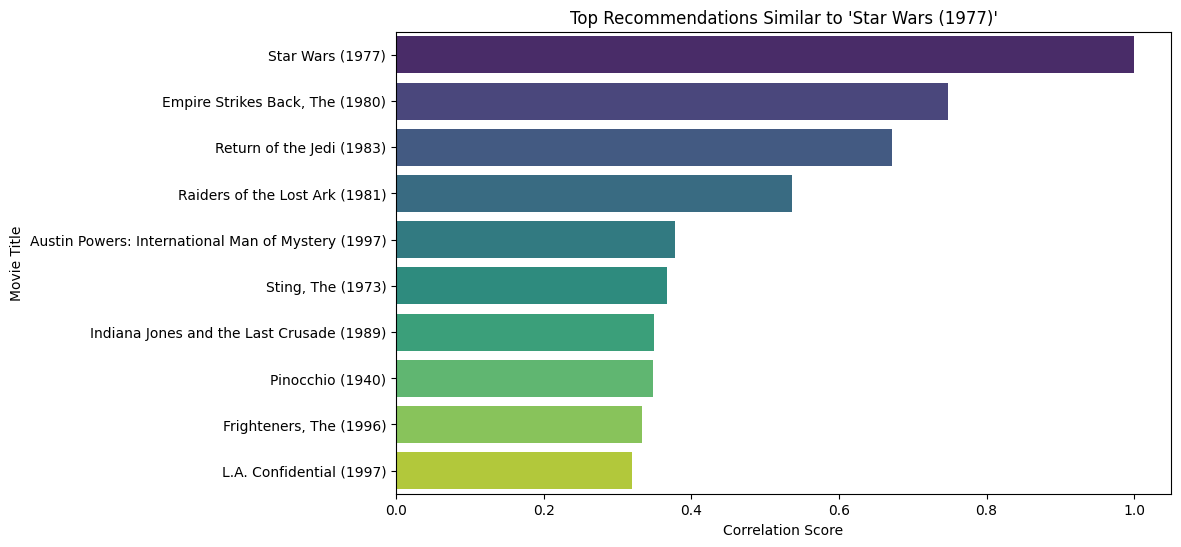

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y=recommendations.index, data=recommendations, palette='viridis')
plt.title(f"Top Recommendations Similar to '{target_movie}'")
plt.xlabel("Correlation Score")
plt.ylabel("Movie Title")
plt.show()


### ✅ Step 8: Conclusion

- We built a simple item-based collaborative filtering system using the MovieLens dataset.
- Using Pearson correlation, we recommended movies similar to a user-selected title.
- This system can be improved using matrix factorization, SVD, or deep learning for more complex and personalized suggestions.
